###   0.1. Business Problem

Mental health challenges among employees in tech companies negatively impact workplace productivity, employee retention, and overall well-being. Despite existing wellness programs, organizations struggle to proactively identify employees at risk, leading to delayed intervention, increased absenteeism, and higher turnover costs. To address this, we aim to develop a predictive model that classifies employees as at risk or not at risk based on demographic and job-related data. By enabling early identification, this model will empower organizations to implement targeted mental health support systems, improve workplace satisfaction, and enhance overall productivity while fostering a healthier work environment.


### 1. Business Understanding

##  1.1. Business Objectives
- Early identification of At-risk Employees - Develop a predictive model to classify employees as at risk or not at risk based on demographic and job-related data.

- Identify Key Risk Factors - Identify the strongest predictors of mental health risk by analyzing demographic, workplace, and personal mental health history features.

- Enable Proactive Intervention - Enable early intervention through predictive insights to inform targeted wellness programs and enhance workplace policies.

### 1.2. Key stakeholders

- Employees – Benefit from a healthier, more supportive work environment.

- Executives & Decision-Makers – Assess ROI through productivity improvements and cost savings.

- HR & Wellness Teams – Implement interventions based on model insights.


### 1.3. Business Impact
- Mental health-friendly workplaces will boost job satisfaction and increase retention among highly skilled tech professionals.

- Organizations can personalize wellness initiatives based on real risks rather than general assumptions.


### 2. Data Understanding

In [98]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


In [3]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [62]:
df.dtypes

Age                           int64
Gender                        int64
Country                       int64
self_employed                 int64
family_history                int64
treatment                    object
work_interfere               object
no_employees                 object
remote_work                   int64
tech_company                  int64
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

### Data Preparation


In [5]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)

df.isnull().sum().max() 
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:

df.fillna({'Age': 0, 'Gender': 'NaN', 'Country': 'NaN'}, inplace=True)

df.head(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,M,Canada,NaN,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [8]:
gender = df["Gender"].unique()
gender

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [9]:
male_str = ['male', 'm', 'M', 'Cis Male', 'Male']
female_str = ['Female', 'F', 'female', 'cis-female/femme', 'f', 'Female (cis)','Female ']
for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
       df.loc[:, 'Gender'] = df['Gender'].replace(to_replace=col.Gender, value='male')

    if str.lower(col.Gender) in female_str:
        df.loc[:, 'Gender'] = df['Gender'].replace(to_replace=col.Gender, value='female')

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]
     
print(df['Gender'].unique())


['female' 'male' 'Male-ish' 'maile' 'Trans-female' 'Cis Female'
 'something kinda male?' 'Cis Male' 'Woman' 'Mal' 'Male (CIS)'
 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah' 'All' 'Enby'
 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender' 'Guy (-ish) ^_^'
 'male leaning androgynous' 'Male ' 'Man' 'Trans woman' 'msle' 'Neuter'
 'Female (trans)' 'queer' 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [11]:
df['self_employed'] = df['self_employed'].replace([None, np.nan], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [13]:
work_interfere = df['work_interfere'].unique()
work_interfere

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [15]:
df['work_interfere'] = df['work_interfere'].replace([None, np.nan], 'Don\'t know')
df['work_interfere']

0            Often
1           Rarely
2           Rarely
3            Often
4            Never
           ...    
1254    Don't know
1255         Often
1256     Sometimes
1257    Don't know
1258     Sometimes
Name: work_interfere, Length: 1257, dtype: object

In [46]:
print(len(df))
print(df.shape)

1257
(1257, 24)


In [72]:
# oneHotEncoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_cols = ['self_employed', 'family_history', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',   
                    'treatment', 'work_interfere', 'no_employees', 'leave',
                    'mental_health_consequence', 'phys_health_consequence', 
                    'coworkers', 'supervisor', 'mental_health_interview', 
                    'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))


In [73]:
df.dtypes

Age                          int64
Gender                       int64
Country                      int64
self_employed                int64
family_history               int64
treatment                    int64
work_interfere               int64
no_employees                 int64
remote_work                  int64
tech_company                 int64
benefits                     int64
care_options                 int64
wellness_program             int64
seek_help                    int64
anonymity                    int64
leave                        int64
mental_health_consequence    int64
phys_health_consequence      int64
coworkers                    int64
supervisor                   int64
mental_health_interview      int64
phys_health_interview        int64
mental_vs_physical           int64
obs_consequence              int64
dtype: object

In [91]:
df.corr()['treatment'].sort_values(ascending=False)

treatment                    1.000000
work_interfere               0.615657
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
Country                      0.053494
phys_health_interview        0.049234
mental_health_consequence    0.027943
Age                          0.027926
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
Gender                      -0.067450
Name: treatment, dtype: float64

### Modelling

In [75]:
X = df.drop('treatment', axis=1)  
y = df['treatment']  

In [76]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [78]:
y_pred = model.predict(X_test)


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       120
           1       0.76      0.85      0.80       132

    accuracy                           0.78       252
   macro avg       0.78      0.77      0.78       252
weighted avg       0.78      0.78      0.78       252


Confusion Matrix:
 [[ 84  36]
 [ 20 112]]


In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [82]:
best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [83]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top 10 most relevant features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_train, y_train)

# See which features matter most
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Gender', 'Country', 'family_history', 'work_interfere',
       'care_options', 'seek_help', 'anonymity', 'phys_health_interview',
       'obs_consequence'],
      dtype='object')


In [84]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76       120
           1       0.75      0.92      0.83       132

    accuracy                           0.80       252
   macro avg       0.82      0.80      0.80       252
weighted avg       0.82      0.80      0.80       252



### Visualization

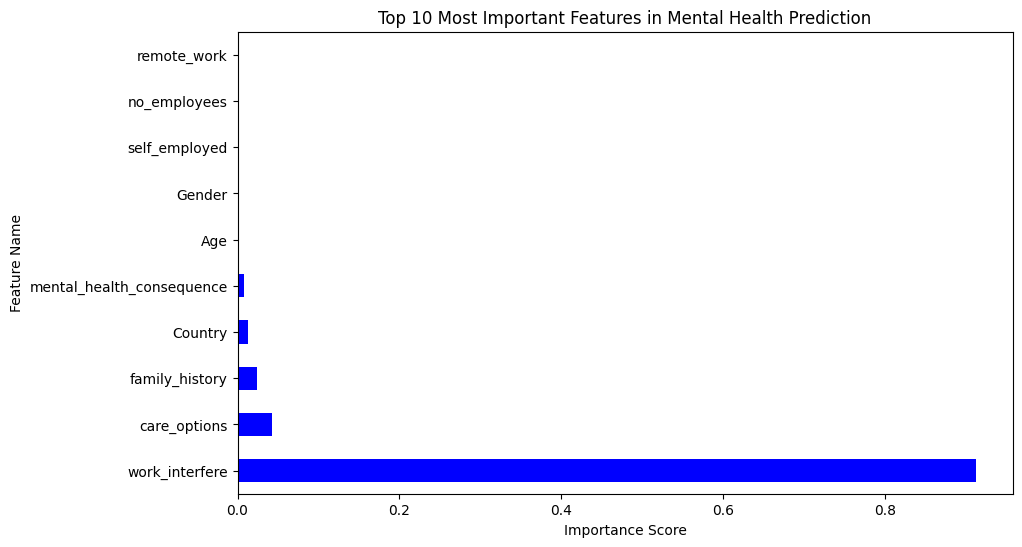

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Plot top features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='blue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Most Important Features in Mental Health Prediction")
plt.show()

In [95]:
# Focusing on the 3 important features
# Redefine the dataset
X_selected = df[['work_interfere', 'care_options', 'family_history']]
y = df['treatment'] 


In [96]:
#split the model

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [99]:
# train the model

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [102]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(classification_report(y_test, y_pred))

Model Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.87      0.68      0.77       120
           1       0.76      0.91      0.83       132

    accuracy                           0.80       252
   macro avg       0.82      0.80      0.80       252
weighted avg       0.81      0.80      0.80       252

